In [2]:
import cv2
import numpy as np

import plotimages

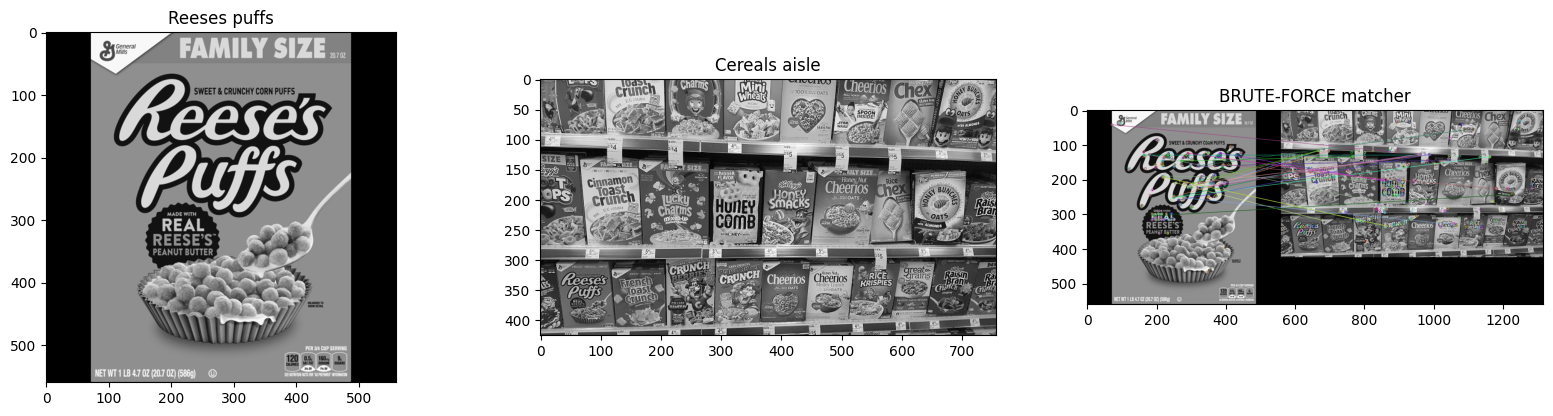

In [3]:
'''
    Feature matching - extract defining key features from an input image
'''
figures = plotimages.plotimages(2,3)

reeses = cv2.imread('reeses_puffs.png', 0)
plotimages.display_img(figures,reeses, 'Reeses puffs', 'gray')

cereals = cv2.imread('many_cereals.jpg', 0)
plotimages.display_img(figures, cereals, 'Cereals aisle', 'gray')

# create an ORB (Oriented Fast and Rotated BRIEF) object to detect key points in the given image
orb = cv2.ORB_create()
# find keypoints and their descriptions
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

# BRUTE-FORCE DESCRIPTOR MATCHER
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None)
plotimages.display_img(figures, reeses_matches, 'BRUTE-FORCE matcher')
